In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:,1:].values

In [28]:
print(X)

[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]
 ['Female' 22 17 76]
 ['Female' 35 18 6]
 ['Female' 23 18 94]
 ['Male' 64 19 3]
 ['Female' 30 19 72]
 ['Male' 67 19 14]
 ['Female' 35 19 99]
 ['Female' 58 20 15]
 ['Female' 24 20 77]
 ['Male' 37 20 13]
 ['Male' 22 20 79]
 ['Female' 35 21 35]
 ['Male' 20 21 66]
 ['Male' 52 23 29]
 ['Female' 35 23 98]
 ['Male' 35 24 35]
 ['Male' 25 24 73]
 ['Female' 46 25 5]
 ['Male' 31 25 73]
 ['Female' 54 28 14]
 ['Male' 29 28 82]
 ['Female' 45 28 32]
 ['Male' 35 28 61]
 ['Female' 40 29 31]
 ['Female' 23 29 87]
 ['Male' 60 30 4]
 ['Female' 21 30 73]
 ['Male' 53 33 4]
 ['Male' 18 33 92]
 ['Female' 49 33 14]
 ['Female' 21 33 81]
 ['Female' 42 34 17]
 ['Female' 30 34 73]
 ['Female' 36 37 26]
 ['Female' 20 37 75]
 ['Female' 65 38 35]
 ['Male' 24 38 92]
 ['Male' 48 39 36]
 ['Female' 31 39 61]
 ['Female' 49 39 28]
 ['Female' 24 39 65]
 ['Female' 50 40 55]
 ['Female' 27 40 47]
 ['Female' 29 40 42]
 ['Female' 31

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
print(X[:,:])

[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]
 ['Female' 22 17 76]
 ['Female' 35 18 6]
 ['Female' 23 18 94]
 ['Male' 64 19 3]
 ['Female' 30 19 72]
 ['Male' 67 19 14]
 ['Female' 35 19 99]
 ['Female' 58 20 15]
 ['Female' 24 20 77]
 ['Male' 37 20 13]
 ['Male' 22 20 79]
 ['Female' 35 21 35]
 ['Male' 20 21 66]
 ['Male' 52 23 29]
 ['Female' 35 23 98]
 ['Male' 35 24 35]
 ['Male' 25 24 73]
 ['Female' 46 25 5]
 ['Male' 31 25 73]
 ['Female' 54 28 14]
 ['Male' 29 28 82]
 ['Female' 45 28 32]
 ['Male' 35 28 61]
 ['Female' 40 29 31]
 ['Female' 23 29 87]
 ['Male' 60 30 4]
 ['Female' 21 30 73]
 ['Male' 53 33 4]
 ['Male' 18 33 92]
 ['Female' 49 33 14]
 ['Female' 21 33 81]
 ['Female' 42 34 17]
 ['Female' 30 34 73]
 ['Female' 36 37 26]
 ['Female' 20 37 75]
 ['Female' 65 38 35]
 ['Male' 24 38 92]
 ['Male' 48 39 36]
 ['Female' 31 39 61]
 ['Female' 49 39 28]
 ['Female' 24 39 65]
 ['Female' 50 40 55]
 ['Female' 27 40 47]
 ['Female' 29 40 42]
 ['Female' 31

In [31]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), [0])  # apply OneHotEncoder to column 0
    ],
    remainder='passthrough'  # keep the other columns (like column 1) as is
)

In [ ]:
X = column_transformer.fit_transform(X)

In [33]:
print(X[:,3])

[15 15 16 16 17 17 18 18 19 19 19 19 20 20 20 20 21 21 23 23 24 24 25 25
 28 28 28 28 29 29 30 30 33 33 33 33 34 34 37 37 38 38 39 39 39 39 40 40
 40 40 42 42 43 43 43 43 44 44 46 46 46 46 47 47 48 48 48 48 48 48 49 49
 50 50 54 54 54 54 54 54 54 54 54 54 54 54 57 57 58 58 59 59 60 60 60 60
 60 60 61 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 65 65 65 65 67 67
 67 67 69 69 70 70 71 71 71 71 71 71 72 72 73 73 73 73 74 74 75 75 76 76
 77 77 77 77 78 78 78 78 78 78 78 78 78 78 78 78 79 79 81 81 85 85 86 86
 87 87 87 87 87 87 88 88 88 88 93 93 97 97 98 98 99 99 101 101 103 103 103
 103 113 113 120 120 126 126 137 137]


In [34]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


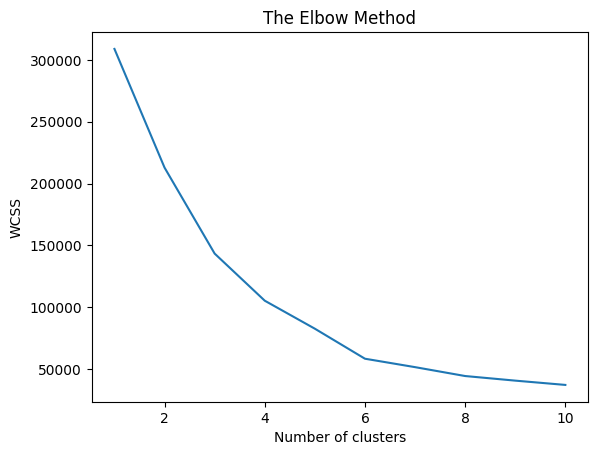

In [35]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [37]:
from sklearn.decomposition import PCA
labels = kmeans.labels_

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

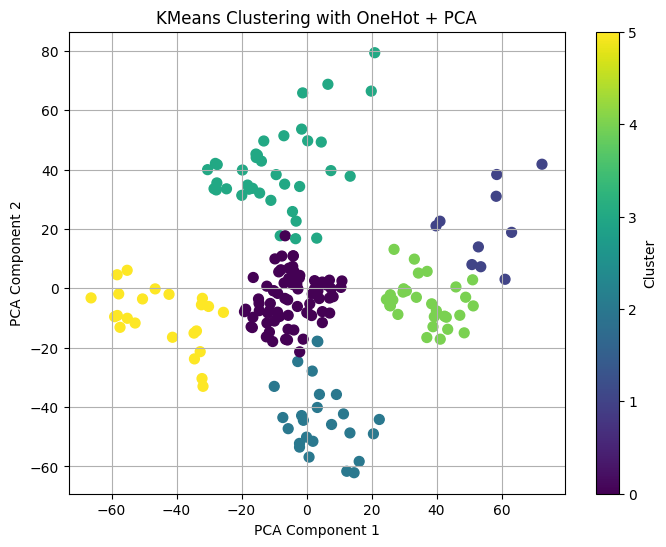

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clustering with OneHot + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()